# 1. Importaciones

Antes que nada debemos de realizar todas las importaciones pertinentes para el desarrollo de toda la tarea

In [79]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
%matplotlib inline

# 2. PCA

## 2.1 Mean Face

1. Se descargan los archhivos de la pagina web, como esta se descarga en formato .zip, se debe de descromprimir para poder extraer toda la información. Para esto usamos la funcion "download_files" que permite realizar todo lo descrito anteriormente.

In [80]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes si no existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

2. Luego se escogen aleatoriamente varios archivos con ayuda de un número random, dependiendo del grado de libertad que le demos al programa este va a elegir unos u otros archivos, aunque el análisis se puede hacer sin aleatorizar los datos. Luego se guardaran dichos datos en un array "X" como se evidencia a continuación:

In [81]:
d_name = 'data/faces/rawdata'
sample = 0.2
X = []
X2 = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())
X = np.array(X)

for nfile in  os.listdir(d_name):
    bytes_read = open(os.path.join(d_name,nfile), "rb").read()
    img = Image.frombytes('L', (128,128), bytes_read)
    X2.append(np.array(img).flatten())
X2 = np.array(X2)

3. Después se usa una función básica para poder mostrar una imagen, que se usa más adelante en el código:

In [82]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

In [128]:
def plot_n_images(data, messages):
    i = 0
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,len(data), constrained_layout=True,figsize=(15,15))
    for item in range(len(data)):
        ax[item].imshow(fn_shape(data[item]))
        ax[item].set_title(label=messages[i])
        ax[item].grid(False)
        i += 1
    plt.show()

4. Se calcula el promedio de todos los datos obtenidos:

In [84]:
X_mean = X.mean(axis=0)
X_mean2 = X2.mean(axis=0)

5. Por último se muestra la imagen resultante con la media de todos los datos para poder visualizar la "Cara media":

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

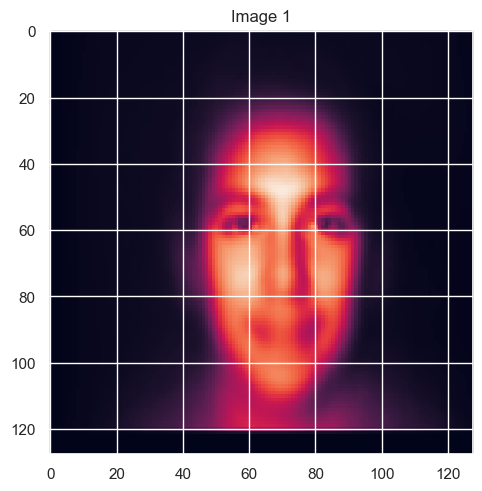

In [85]:
plot_1_images(X_mean)

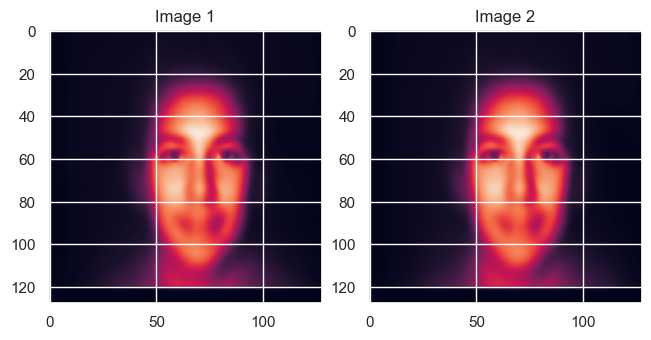

In [86]:
plot_n_images([X_mean,X_mean2])

## 2.2. PCA

1. Debemos de calcular la media de todos los datos selecionados, esto simplemente se usa con una funcion propia de los arreglos o matrices.

In [87]:
x_mean = X.mean(axis=0)

2. Luego se deben de centrar los datos con la media calculada, esto es util al utilizar PCA ya que nos ayuda a tener interpretaiones mas clara y además, como se tiene que calcular la covarianza, esta se ve afectada por la ubicacion de los datos en relacion al origen.

In [88]:
x_center = X - x_mean

3. Se aplica PCA con un valor de 200 componentes ya que esos son los componentes principales que quiero que se mantengan despues de la reducción de dimensionalidad.

In [89]:
pca = PCA(n_components=200)

4. El metodo fit_tranform combina dos funciones, fit y tranform, que se traduce basicamente en ajustar PCA a los datos de la imagenes pasandole como parametro los datos ya centralizados.

In [90]:
x_reduced = pca.fit_transform(x_center)

5. Se calcula los eigen valores y las eigen caras que son basicamente los eigen vectores.

In [91]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

6. Para calcular la proporcion de la varianza en cada componente y sumarlas entre si

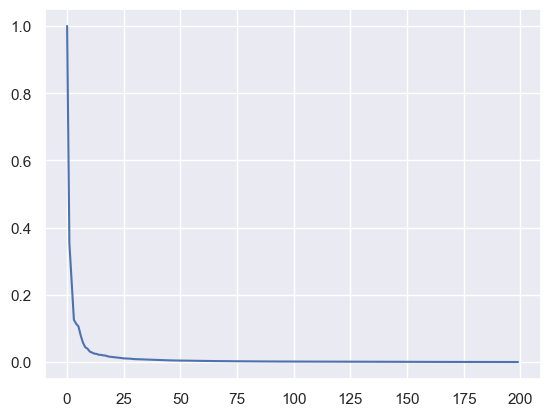

In [92]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
plt.plot(range(0,200), eigen_values/eigen_values[0])

In [121]:
cumulative_variance

array([0.33527438, 0.45389331, 0.53414334, 0.57635781, 0.6146383 ,
       0.65037938, 0.67704026, 0.69651194, 0.71140965, 0.72491479,
       0.73552482, 0.74517839, 0.75376327, 0.76202261, 0.76943318,
       0.77670646, 0.78347699, 0.79004363, 0.79583344, 0.80125402,
       0.80644999, 0.81140476, 0.81622278, 0.82063402, 0.82473104,
       0.82852748, 0.83224483, 0.8357847 , 0.83928006, 0.84248551,
       0.84553064, 0.84854966, 0.85145113, 0.85426204, 0.8569355 ,
       0.85954545, 0.86207581, 0.86454312, 0.86695264, 0.86925293,
       0.87136346, 0.8734482 , 0.87546606, 0.87742936, 0.87934493,
       0.88117378, 0.88292913, 0.88466652, 0.88635158, 0.8879981 ,
       0.88957701, 0.89111465, 0.89263266, 0.89406201, 0.89546359,
       0.89685363, 0.89822165, 0.89956229, 0.90085962, 0.90211877,
       0.90334242, 0.90455044, 0.90573776, 0.9068982 , 0.90804707,
       0.90918694, 0.91029379, 0.9113798 , 0.91245584, 0.91351301,
       0.91453105, 0.91552729, 0.91651861, 0.91748853, 0.91845

In [94]:
num_components_90

59

### 2.2.1 Modificacion De Caras

El valor correspondiente a la explicacion del 99% de la varianza no es posible realizarse ya que la varianza acumulativa solo alcanza un maximo de 97%, como se muestra a continuacion

In [123]:
cumulative_variance[-1]

97.29830194465613

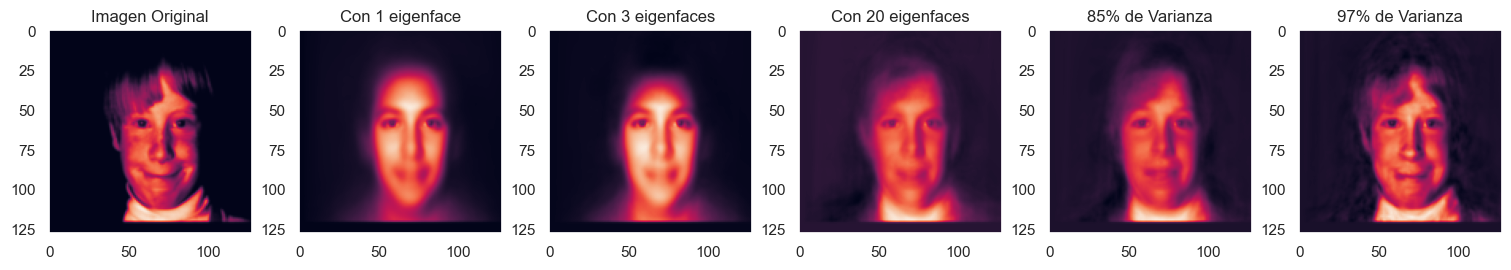

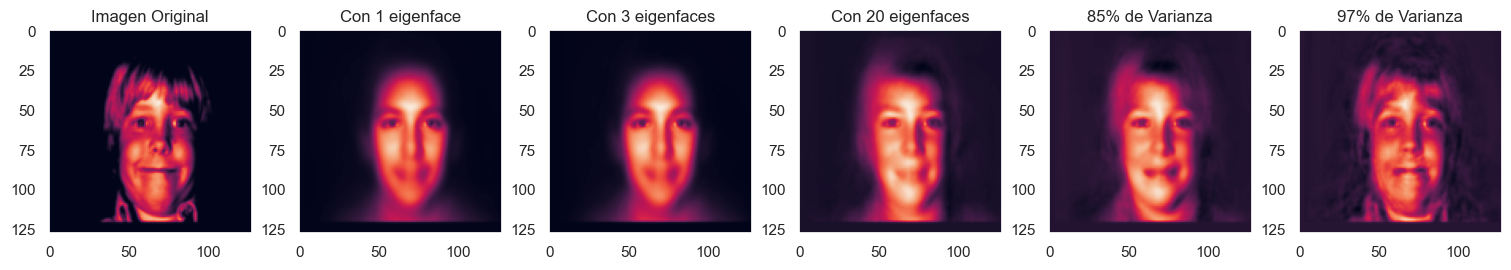

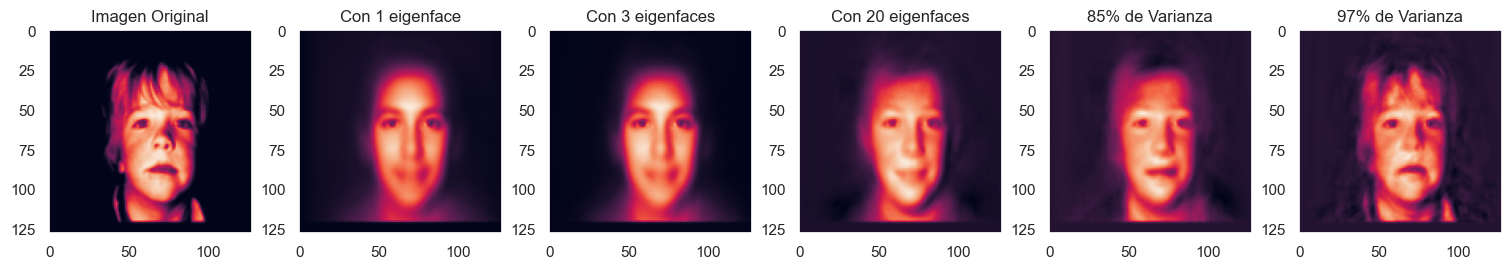

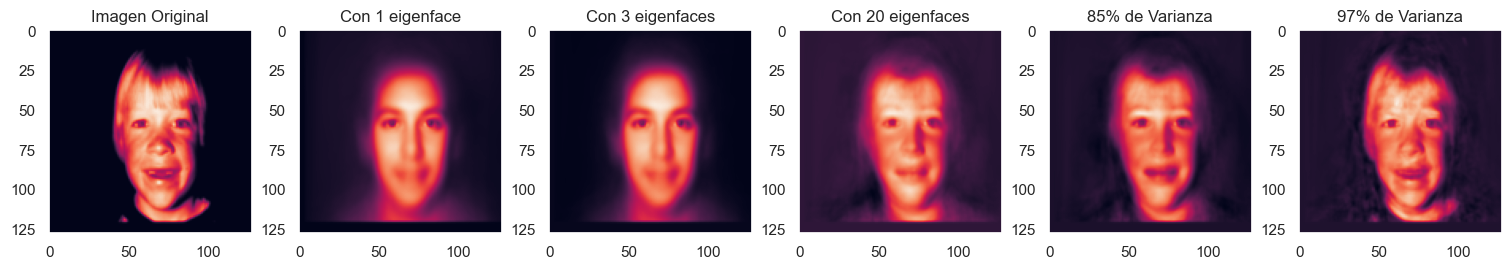

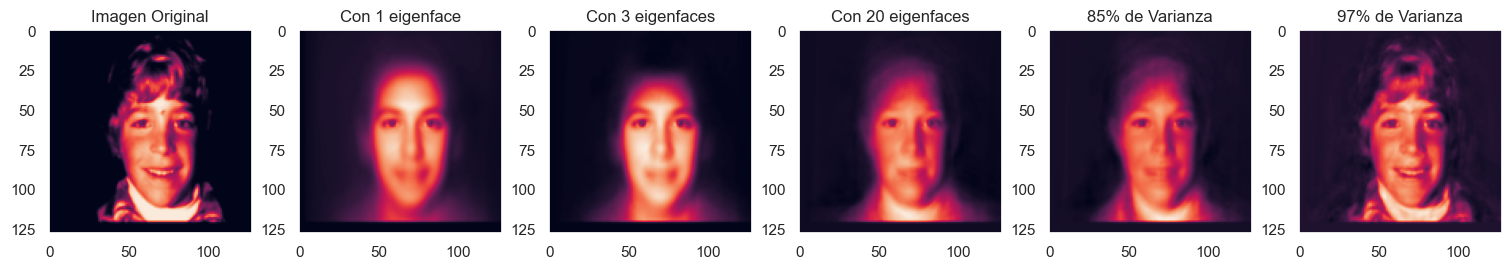

In [130]:
set_face_1 = [X[0],
              np.dot(x_reduced[0].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
              np.dot(x_reduced[0].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
              np.dot(x_reduced[0].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
              np.dot(x_reduced[0].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
              np.dot(x_reduced[0].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.97) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.97) + 1),:]) + x_mean]

set_face_2 = [X[1],
              np.dot(x_reduced[1].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
              np.dot(x_reduced[1].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
              np.dot(x_reduced[1].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
              np.dot(x_reduced[1].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
              np.dot(x_reduced[1].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.97) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.97) + 1),:]) + x_mean]

set_face_3 = [X[2],
              np.dot(x_reduced[2].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
              np.dot(x_reduced[2].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
              np.dot(x_reduced[2].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
              np.dot(x_reduced[2].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
              np.dot(x_reduced[2].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.97) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.97) + 1),:]) + x_mean]

set_face_4 = [X[3],
              np.dot(x_reduced[3].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
              np.dot(x_reduced[3].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
              np.dot(x_reduced[3].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
              np.dot(x_reduced[3].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
              np.dot(x_reduced[3].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.97) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.97) + 1),:]) + x_mean]

set_face_5 = [X[4],
              np.dot(x_reduced[4].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
              np.dot(x_reduced[4].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
              np.dot(x_reduced[4].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
              np.dot(x_reduced[4].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
              np.dot(x_reduced[4].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.97) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.97) + 1),:]) + x_mean]

messages_list = ["Imagen Original","Con 1 eigenface","Con 3 eigenfaces","Con 20 eigenfaces","85% de Varianza","97% de Varianza"]
plot_n_images(set_face_1,messages_list)
plot_n_images(set_face_2,messages_list)
plot_n_images(set_face_3,messages_list)
plot_n_images(set_face_4,messages_list)
plot_n_images(set_face_5,messages_list)